Made by:
- Julian Leonardo Avila Martinez - 20212107030

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = './Data-sets/Datos.xlsx'

In [37]:
dataframe =  pd.read_excel(data)
dataframe

,ingresos,consumo
0,44.617090,9.720475
1,73.430827,12.340257
2,5.010866,1.535624
3,33.721594,7.879812
4,18.941810,4.721109
...,...,...
995,97.568330,10.996982
996,34.611777,8.115961
997,68.535678,12.183459
998,35.966885,8.694838


In [38]:
df = dataframe.head(100)
df

,ingresos,consumo
0,44.617090,9.720475
1,73.430827,12.340257
2,5.010866,1.535624
3,33.721594,7.879812
4,18.941810,4.721109
...,...,...
95,27.517563,6.976159
96,90.821054,11.435282
97,59.499551,11.492588
98,5.272681,1.629971


In [39]:
x_column = 'ingresos'
y_column = 'consumo'

def hypothesis(w, x):
    return w * x

initial_w = 0.1
df['prediction'] = hypothesis(initial_w, df[x_column])
df

/tmp/ipykernel_564371/611407421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction'] = hypothesis(initial_w, df[x_column])


,ingresos,consumo,prediction
0,44.617090,9.720475,4.461709
1,73.430827,12.340257,7.343083
2,5.010866,1.535624,0.501087
3,33.721594,7.879812,3.372159
4,18.941810,4.721109,1.894181
...,...,...,...
95,27.517563,6.976159,2.751756
96,90.821054,11.435282,9.082105
97,59.499551,11.492588,5.949955
98,5.272681,1.629971,0.527268


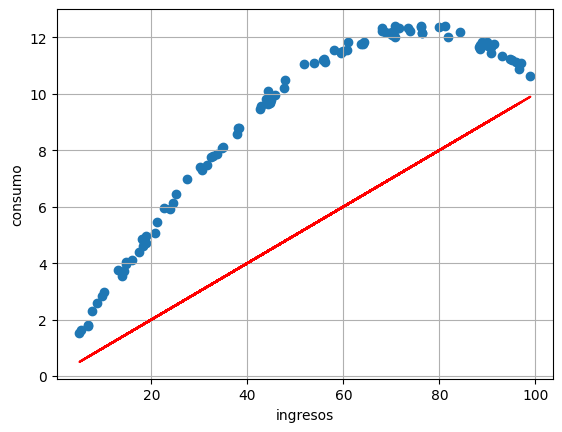

In [40]:
fid, ax = plt.subplots()

ax.scatter(df[x_column], df[y_column])
ax.plot(df[x_column], df['prediction'], color='red')

ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

plt.grid(True)
plt.show()

Optimal w: 0.1606060606060606, Minimum error: 5.039819865854547


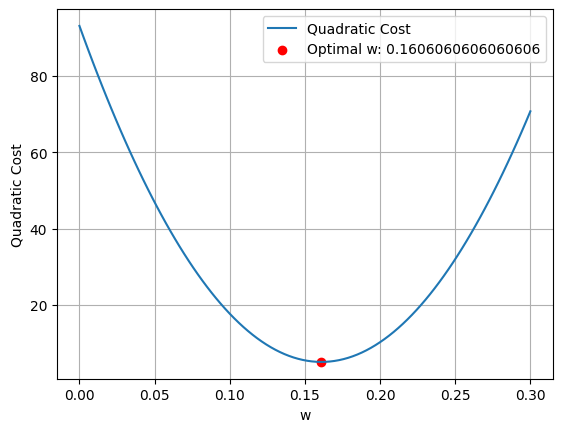

In [41]:
def quadratic_cost(x, y, w):
    h = hypothesis(w, x)
    return np.mean((h - y) ** 2)

w_values = np.linspace(0.0, 0.3, 100)
error_values = np.array([quadratic_cost(df[x_column], df[y_column], w) for w in w_values])

w_min = w_values[error_values.argmin()]
error_min = error_values.min()

print(f"Optimal w: {w_min}, Minimum error: {error_min}")

plt.figure()
plt.plot(w_values, error_values, label='Quadratic Cost')
plt.scatter(w_min, error_min, color='red', label=f'Optimal w: {w_min}')
plt.xlabel('w')
plt.ylabel('Quadratic Cost')
plt.grid(True)
plt.legend()
plt.show()
plt.show()

Using normal equation w = 0.16097891362016353
Previous result w = 0.1606060606060606
Difference of: 0.0003728530141029196
Percentage relative error: 0.23161605810229396


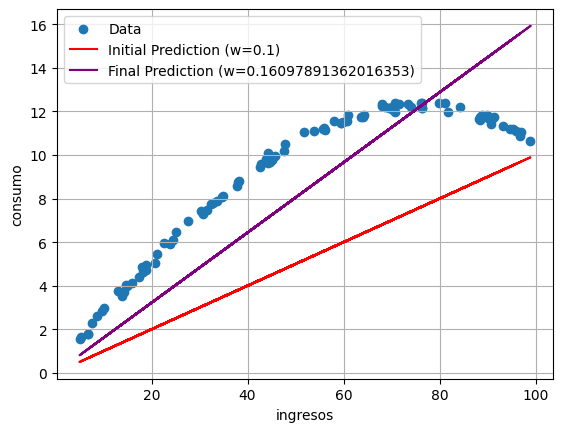

In [42]:
def normal_equation(data, x, y):
    return np.sum(data[x] * data[y]) / np.sum(data[x]**2)

w_normal = normal_equation(df, x_column, y_column)

print(f"Using normal equation w =", w_normal)
print(f"Previous result w =", w_min)
print(f"Difference of:", w_normal - w_min)
print(f"Percentage relative error:", 100 * (w_normal - w_min) / w_normal)

plt.figure()
plt.scatter(df[x_column], df[y_column], label='Data')
plt.plot(df[x_column], df['prediction'], color='red', label=f'Initial Prediction (w={initial_w})')
plt.plot(df[x_column], hypothesis(w_normal, df[x_column]), color='purple', label=f'Final Prediction (w={w_normal})')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.legend()
plt.show()

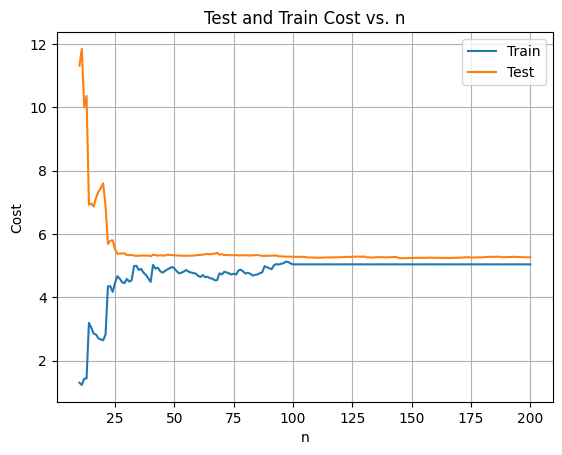

In [43]:
n_values = np.linspace(10, 200, 190, dtype=int)
test = []
train = []

for n in n_values:
    n_t = 1000 - n

    df_t = dataframe.head(n_t)
    df_n = df.head(n)

    w_normal = normal_equation(df_n, x_column, y_column)

    bias = quadratic_cost(df_n[x_column], df_n[y_column], w_normal)
    rp = quadratic_cost(df_t[x_column], df_t[y_column], w_normal)

    test.append(rp)
    train.append(bias)

plt.figure()
plt.plot(n_values, train, label="Train")
plt.plot(n_values, test, label="Test")

plt.xlabel("n")
plt.ylabel("Cost")
plt.title("Test and Train Cost vs. n")
plt.legend()
plt.grid(True)

plt.show()